## 결정 트리 (Decision Tree)

### 1. 개요
- 데이터를 **특성(feature)** 기준으로 나누며 예측을 수행하는 모델  
- 마치 질문을 던지며 분기하는 **트리 구조(tree structure)** 로 이루어짐  
- 분류(Classification)와 회귀(Regression) 모두에 사용 가능  
- Scikit-learn 제공 함수  
  - 분류용: `DecisionTreeClassifier()`  
  - 회귀용: `DecisionTreeRegressor()`

---

### 2. 클래스 확률 (Class Probability)
- 분류 문제에서는 각 노드에 도달한 **데이터 클래스의 비율**을 이용해 예측 확률을 계산함  
- 예: 특정 노드에 도달한 샘플 중  
  - 클래스 A: 7개, 클래스 B: 3개 → 클래스 A 확률 = 0.7, 클래스 B 확률 = 0.3  
- 최종 예측 클래스 = 확률이 가장 높은 클래스

---

### 3. 판별 기준 (Splitting Criterion)
- 데이터를 분할할 때, **노드의 불순도(impurity)** 를 최소화하는 방향으로 나눔  
- 대표적인 기준  
  - **지니 불순도(Gini impurity)**  
    $$
    G = 1 - \sum p_i^2
    $$
  - **엔트로피(Entropy)**  
    $$
    H = - \sum p_i \log_2 p_i
    $$
  - **분산 감소(Variance Reduction)** — 회귀 문제에 사용

---

### 4. 트리 종료 조건 (Stopping Criteria)
- 트리 성장이 무한히 이어지는 것을 방지하기 위해 제한 조건을 둔다.
- 대표적인 종료 기준:
  - 트리의 **최대 깊이(max_depth)** 도달
  - 노드 내 샘플 수가 **최소 샘플 수(min_samples_split)** 보다 작음
  - 불순도 감소량이 **임계값 이하**일 때 중단

---

### 5. 예시 ① : 유방암 분류
- `sklearn.datasets.load_breast_cancer()` 데이터 사용  
- 주요 특성(feature): 평균 반경, 질감, 매끄러움 등  
- 트리를 이용해 악성(Malignant) / 양성(Benign)을 분류  
- 시각화 도구: `plot_tree()` 또는 `export_graphviz()`

---

### 6. 예시 ② : 타이타닉 생존자 예측
- 특성: 나이(Age), 성별(Sex), 객실등급(Pclass), 운임(Fare) 등  
- 모델이 자동으로 중요한 특성을 선택하며 분류 수행  
- 결과적으로 “성별 → 객실등급 → 나이” 순으로 분기되는 경향이 있음

---

### 7. 내부 변수 (Model Attributes)
- `feature_importances_` : 각 특성의 중요도 (0~1 사이 값)  
- `max_depth` : 트리의 최대 깊이  
- `n_classes_` : 클래스 개수  
- `n_features_in_` : 입력 특성 개수  
- `tree_` : 전체 트리 구조 및 노드 정보

---

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## **데이터 로드 및 준비**

In [2]:
iris = load_iris()
X = iris.data[:, :2]   # 꽃받침 길이(sepal length), 너비(sepal width)
y = iris.target

### **결정 트리 모델 생성 및 학습**

In [3]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

### **트리 구조 그리기 (Graphviz 이용)**

!pip install graphviz

In [4]:
from sklearn.tree import export_graphviz
import graphviz

In [5]:
dot_file = './iris.dot'
export_graphviz(
    clf,
    out_file=dot_file,
    feature_names=iris.feature_names[:2],
    class_names=iris.target_names,
    filled=True
)

# dot 파일을 읽어서 시각화 출력
with open(dot_file, encoding='utf-8') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

### **결정 경계선 그리기(데이터 시각화)**

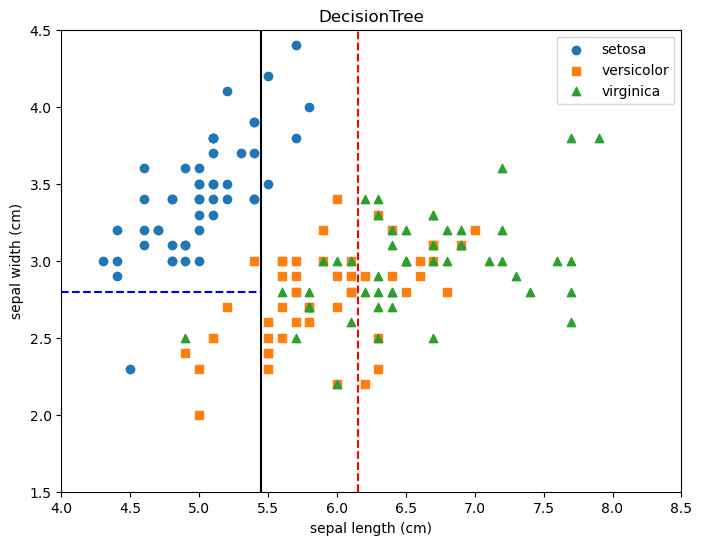

In [6]:
plt.figure(figsize=(8, 6))

# 각 클래스별 산점도
markers = ['o', 's', '^']
for i in range(3):
    xs = X[y == i, 0]
    ys = X[y == i, 1]
    plt.scatter(xs, ys, marker=markers[i], label=iris.target_names[i])

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()

# --------------------------------------------------
# 트리의 분할 기준선을 시각화
# --------------------------------------------------
# 검정색 실선 (첫 번째 분할)
xx = np.linspace(5.45, 5.45, 20)
yy = np.linspace(1.5, 4.5, 20)
plt.plot(xx, yy, '-k', label='black')

# 파란색 점선 (두 번째 분할)
xx = np.linspace(4, 5.45, 20)
yy = np.linspace(2.8, 2.8, 20)
plt.plot(xx, yy, '--b', label='blue')

# 붉은색 점선 (세 번째 분할)
xx = np.linspace(6.15, 6.15, 20)
yy = np.linspace(1.5, 4.5, 20)
plt.plot(xx, yy, '--r', label='red')

plt.xlim(4, 8.5)
plt.ylim(1.5, 4.5)
plt.title("DecisionTree")
plt.show()

### **모델 테스트**

In [7]:
clf.predict([[5.5, 4]])

array([1])

In [8]:
clf.predict_proba([[5.5, 4]])

array([[0.11627907, 0.65116279, 0.23255814]])

## **유방암 데이터 적용**

In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### **데이터준비**

In [10]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

In [11]:
np.random.seed(9)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, y_train)
print(rfc.score(X_test, y_test))

0.951048951048951


In [13]:
df = pd.DataFrame({'feature': cancer.feature_names,
                   'importance':rfc.feature_importances_})
df = df.sort_values('importance', ascending=False)

x = df.feature
y = df.importance
ypos = np.arange(len(x))

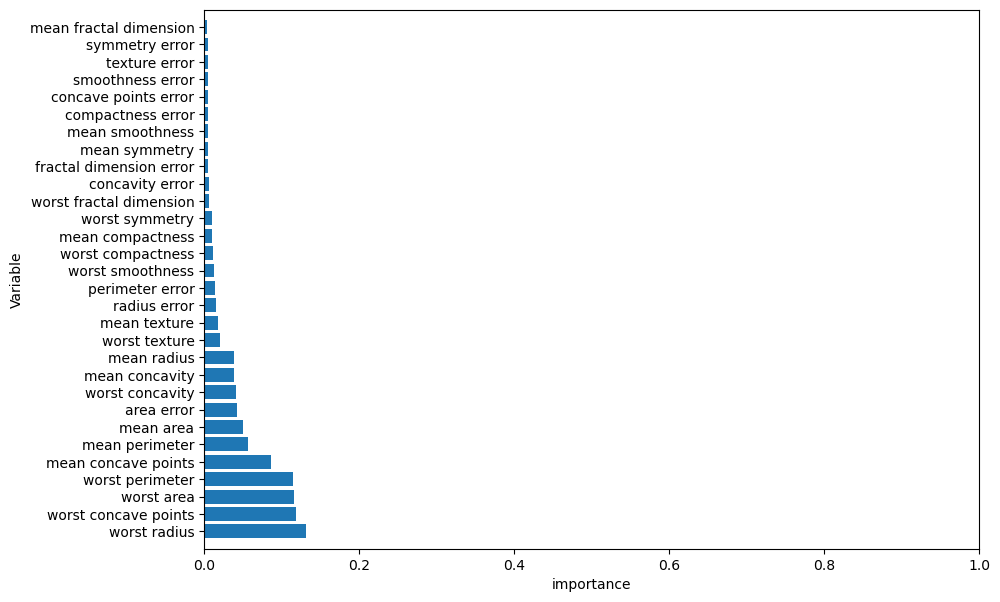

In [14]:
plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('importance')
plt.ylabel('Variable')
plt.xlim(0,1)
plt.ylim(-1, len(x))
plt.show()